# PSI3471 - Exercício 1: Regressão Linear

Pedro Buczinski Lages de Carvalho - 12555266 \\
Cesar Eduardo Botoni Lima - 12703142 \\

Teste:

$MSE:  20895033.055221226  \\
RMSE:  4571.108514925152 \\
R^2: 0.46953073060226846$


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Importanto e Analisando os Dados

In [4]:
from google.colab import drive
drive.mount('/content/drive')

try:
  dados_train = pd.read_csv("vehicles_cleaned_train.csv")
except:
  dados_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PSI3471/Parte 1/EP1/vehicles_cleaned_train.csv")

  try:
    dados_teste = pd.read_csv("vehicles_cleaned_test.csv")
  except:
    dados_teste = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PSI3471/Parte 1/EP1/vehicles_cleaned_test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
print(max(dados_train['price']))
print(min(dados_train['price']))

dados_train.head(10)

39900
1


,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,10400,2011,excellent,4 cylinders,gas,81300,automatic,mid-size,sedan
1,6900,2007,excellent,6 cylinders,gas,79000,automatic,full-size,sedan
2,18900,2018,like new,4 cylinders,gas,5000,automatic,full-size,sedan
3,6000,2010,excellent,4 cylinders,gas,97600,automatic,mid-size,hatchback
4,19995,2013,good,6 cylinders,gas,95782,automatic,mid-size,sedan
5,3400,2007,fair,4 cylinders,gas,78038,automatic,compact,sedan
6,13900,2013,excellent,4 cylinders,gas,28273,automatic,mid-size,sedan
7,7500,2007,like new,4 cylinders,gas,92321,automatic,mid-size,coupe
8,9400,2013,good,4 cylinders,gas,78980,automatic,full-size,coupe
9,12500,2019,like new,4 cylinders,gas,21000,automatic,full-size,sedan


In [6]:
print(max(dados_teste['price']))
print(min(dados_teste['price']))

dados_teste.head()

37995
1


,price,year,condition,cylinders,fuel,odometer,transmission,size,type
0,11995,2018,excellent,4 cylinders,gas,19000,automatic,mid-size,sedan
1,20500,2017,excellent,6 cylinders,gas,68000,automatic,full-size,sedan
2,15800,2018,like new,4 cylinders,gas,41200,automatic,full-size,sedan
3,20980,2015,excellent,6 cylinders,gas,82845,automatic,mid-size,sedan
4,13999,2019,like new,4 cylinders,gas,29638,automatic,full-size,sedan


In [7]:
#Criando as variáveis dummy

fuel_dummy = pd.get_dummies(dados_train['fuel'], dtype= int) #gas ou diesel
type_dummy = pd.get_dummies(dados_train['type'], dtype=int) #sedan, coupe, wagon ou hatchback
cylinders_dummy = pd.get_dummies(dados_train['cylinders'], dtype=int) #4 ou 6 cilindros
transmission_dummy = pd.get_dummies(dados_train['transmission'], dtype=int) #automatico ou manual
condition_dummy = pd.get_dummies(dados_train['condition'], dtype=int) #good, fair, excellent, like new,
size_dummy = pd.get_dummies(dados_train['size'], dtype=int) #compact, mid-size, sub-compact, full-size

# Plotando um Heatmap para observar a relação das variáveis com o preço dos veículos

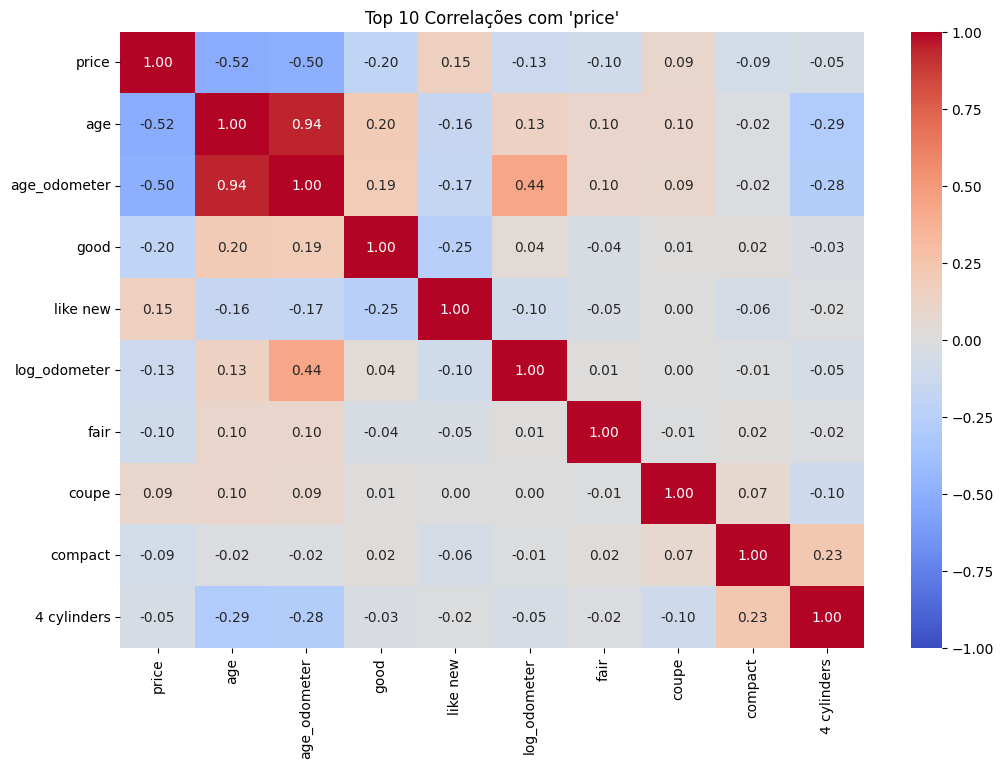

In [8]:
dados_train["log_odometer"] = np.log(dados_train["odometer"] + 1)
dados_train["age"] = 2025 - dados_train["year"]
dados_train['age_odometer'] = dados_train['age'] * dados_train["log_odometer"]
dados_train = dados_train.drop(columns=["year", "odometer"])


plot_data = dados_train[['price','age', 'log_odometer', 'age_odometer']]

plot_data = plot_data.join(condition_dummy)
plot_data = plot_data.join(fuel_dummy)
plot_data = plot_data.join(type_dummy)
plot_data = plot_data.join(cylinders_dummy)
plot_data = plot_data.join(transmission_dummy)
plot_data = plot_data.join(size_dummy)

corr_matrix = plot_data.corr()

# Filtrar apenas as maiores correlações com 'price'
top_corr = corr_matrix['price'].abs().sort_values(ascending=False).head(10).index
filtered_corr = plot_data[top_corr].corr()

plt.figure(figsize=(12,8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Top 10 Correlações com 'price'")
plt.show()

In [9]:
# Filtrando carros com preço acima de $1.000,00
dados_train = dados_train.where(dados_train['price'] > 1000).dropna()
dados_train = dados_train.where(dados_train['price'] < 35000).dropna()

# Selecionando colunas e adicionando variáveis dummies
dado_final = dados_train[['age', 'log_odometer', 'age_odometer']].copy()
dado_final = pd.concat([dado_final, condition_dummy, type_dummy, size_dummy, cylinders_dummy], axis=1)

# Calculando correlação com 'price']
correlacoes = plot_data.corr()['price']

# Filtrando correlações relevantes
limite = 0.05
corr_positiva = correlacoes[correlacoes > limite]
corr_negativa = correlacoes[correlacoes < -limite]

# Combinando correlações positivas e negativas
corr_filtradas = pd.concat([corr_positiva, corr_negativa])
print("Variáveis com correlação significativa:")
print(corr_filtradas.index.tolist())

# Filtra o dado_final para manter só as colunas com correlação significativa
colunas_filtradas = corr_filtradas.index.tolist()
colunas_filtradas.remove('price')
dado_final = dado_final[colunas_filtradas].dropna()


print(dado_final.info())


Variáveis com correlação significativa:
['price', 'like new', 'coupe', '6 cylinders', 'age', 'log_odometer', 'age_odometer', 'fair', 'good', '4 cylinders', 'compact']
<class 'pandas.core.frame.DataFrame'>
Index: 7994 entries, 0 to 8337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   like new      7994 non-null   int64  
 1   coupe         7994 non-null   int64  
 2   6 cylinders   7994 non-null   int64  
 3   age           7994 non-null   float64
 4   log_odometer  7994 non-null   float64
 5   age_odometer  7994 non-null   float64
 6   fair          7994 non-null   int64  
 7   good          7994 non-null   int64  
 8   4 cylinders   7994 non-null   int64  
 9   compact       7994 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 687.0 KB
None


1. Olhando por cima o arquivo csv e obtendo o valor mínimo com **min(dados_train['price'])**, observei que muitos carros eram listados com o preço entre $1,00$ e $200,00$ dólares  , pois muitos vendedores colocam preços baixos nos anúncios para negociar baseado na oferta do comprador. Portanto, removi os carros com valores inferiores a $1.000,00$ dólares do dataset já que esse tipo de dado afetaria bastante o modelo. Por outro lado da moeda, filtrei os veículos com preço acima de $35.000,00$ dólares para remover os *outliers*, que seriam em sua maioria vendedores pedindo mais do que o carro vale.

2. Removi também os tipos de transmissão e de combustível, pois tinham uma relação muito fraca com o preço; Além disso, estabeleci a condição de $|0,05|$ de correlação positiva e negativa para retirar valores de variáveis irrelevantes, como: 'salvage', 'new', 'excellent' da variável 'condition', que possuim relação baixa com o preço, por exemplo.

# Funções de Regressão Linear

In [10]:
def RL_polinomial(X, d):

    d = d.reshape(-1, 1)
    wo = np.linalg.pinv(X) @ d

    e = d - (X @ wo)

    return wo, e


In [11]:
def teste_pol(wo, xn):
    wo = wo.reshape(-1, 1)

    return xn @ wo


In [12]:
def tratar(dado):

  X = dado.copy()
  bias = np.ones(dado.shape[0]).reshape(-1, 1) #preenche X com bias

  X.insert(0, "bias", bias)


  X = X.to_numpy()
  return X

In [13]:
X = tratar(dado_final)
d = (dados_train['price'].to_numpy().reshape(-1,1))

wo, e = RL_polinomial(X, d)

print(e.max())
print(e.min())

estimados = teste_pol(wo, X)

27709.85114140505
-19696.81081605893


In [14]:
erro_quad = np.sum((e)**2) / len(e)
print("MSE: ", erro_quad)
print("RMSE: ",  math.sqrt(erro_quad) )

MSE:  20177650.48605284
RMSE:  4491.953971942816


In [15]:
estimados = pd.DataFrame(estimados)
(estimados)

,0
0,9098.973002
1,8720.126680
2,18764.687435
3,8163.402169
4,12180.335714
...,...
7989,18101.707318
7990,14446.135316
7991,5027.319508
7992,13008.950234


In [16]:
(dados_train['price'])

,price
0,10400.0
1,6900.0
2,18900.0
3,6000.0
4,19995.0
...,...
8333,28988.0
8334,17999.0
8335,5900.0
8336,15990.0


# Repetindo o processo para o arquivo de teste:

In [17]:
#Criando as variáveis dummy

fuel_dummy2 = pd.get_dummies(dados_teste['fuel'], dtype= int) #gas ou diesel
type_dummy2 = pd.get_dummies(dados_teste['type'], dtype=int) #sedan, coupe, wagon ou hatchback
cylinders_dummy2 = pd.get_dummies(dados_teste['cylinders'], dtype=int) #4 ou 6 cilindros
transmission_dummy2 = pd.get_dummies(dados_teste['transmission'], dtype=int) #automatico ou manual
condition_dummy2 = pd.get_dummies(dados_teste['condition'], dtype=int) #good, fair, excellent, like new,
size_dummy2 = pd.get_dummies(dados_teste['size'], dtype=int) #compact, mid-size, sub-compact, full-size

In [18]:
dados_teste["log_odometer"] = np.log(dados_teste["odometer"] + 1)
dados_teste["age"] = 2025 - dados_teste["year"]
dados_teste['age_odometer'] = dados_teste['age'] * dados_teste["log_odometer"]
dados_teste = dados_teste.drop(columns=["year", "odometer"])

# Selecionando colunas e adicionando variáveis dummies
dado_final2 = dados_teste[['age', 'log_odometer', 'age_odometer']]
dado_final2 = pd.concat([dado_final2, condition_dummy2, type_dummy2, size_dummy2, cylinders_dummy2], axis=1)

print(dado_final2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           2084 non-null   int64  
 1   log_odometer  2084 non-null   float64
 2   age_odometer  2084 non-null   float64
 3   excellent     2084 non-null   int64  
 4   fair          2084 non-null   int64  
 5   good          2084 non-null   int64  
 6   like new      2084 non-null   int64  
 7   new           2084 non-null   int64  
 8   salvage       2084 non-null   int64  
 9   coupe         2084 non-null   int64  
 10  hatchback     2084 non-null   int64  
 11  sedan         2084 non-null   int64  
 12  wagon         2084 non-null   int64  
 13  compact       2084 non-null   int64  
 14  full-size     2084 non-null   int64  
 15  mid-size      2084 non-null   int64  
 16  sub-compact   2084 non-null   int64  
 17  4 cylinders   2084 non-null   int64  
 18  6 cylinders   2084 non-null 

In [19]:
Xt = tratar(dado_final2)
dt = (dados_teste['price'].to_numpy().reshape(-1,1))

wot, et = RL_polinomial(Xt, dt)

print(et.max())
print(et.min())

estimados_t = teste_pol(wot, Xt)

20777.67424899967
-20763.441668959367


In [20]:
erro_quad_t = np.sum((et)**2) / len(et)
print("MSE: ", erro_quad_t)
print("RMSE: ",  math.sqrt(erro_quad_t) )

def calcular_r2(y_real, y_pred):
    ss_res = np.sum((y_real - y_pred) ** 2)
    ss_tot = np.sum((y_real - np.mean(y_real)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = calcular_r2(d, estimados)
print("R²:", r2)


MSE:  26833944.73692904
RMSE:  5180.1491037352425
R²: 0    0.469531
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [21]:
estimados_t = pd.DataFrame(estimados_t)
(estimados_t)

,0
0,16379.402576
1,17272.935410
2,15753.995142
3,15701.556131
4,17012.462896
...,...
2079,15346.706363
2080,14291.508582
2081,16215.675911
2082,12461.737851


In [22]:
(dados_teste['price'])

,price
0,11995
1,20500
2,15800
3,20980
4,13999
...,...
2079,15895
2080,14390
2081,17995
2082,8900


# Conclusão e Justificativas



*   Usar o odometro na escala logarítmica: A regressão linear assume que as variáveis estão ligadas ao preço de forma linear. A diferença entre 10km e 50km importa mais do que entre 100km e 140km, por exemplo.

*   Às vezes, duas variáveis dizem mais juntas do que isoladas
Exemplo:
Um carro antigo vale menos e um novo vale mais, no entanto, um carro antigo com pouca quilometragem vale mais que a média. Assim como um carro novo que rodou bastante vale menos que a média.

*   Remover outliers: evita que carros muito caros ou muito baratos atrapalhem o modelo.


Para contruir um modelo melhor, acreditamos que eram necessários mais atributos, como marca e modelo do veículo ou o local de fabricação. Um veículo importado de uma marca renomada pode aumentar o valor de um carro apesar da sua idade ou da quilometragem e das outras caracteristicas disponiveis.







